<a href="https://colab.research.google.com/github/GeorgeOgeorge/data_mining_exercices/blob/main/avaliacao_III_unidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABALHO TERCEIRA UNIDADE MINERAÇÃO DE DADOS
## ALUNOS

- DANIEL FERNANDES
- GUSTAVO MACIEL
- GEORGE MENDONÇA

# Bibliotecas:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

# Leitura de Dataset:

In [ ]:
# Obter o link do arquivo CSV
url = "https://raw.githubusercontent.com/GeorgeOgeorge/data_mining_exercices/main/diabetes_prediction_dataset.csv"

# Análise Exploratoria:

In [ ]:
# Ler o conteúdo do arquivo CSV usando o Pandas
df = pd.read_csv(url)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Estatística Descritiva:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Mapeando variáveis categóricas:

In [ ]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,No Info,27.32,6.2,90,0
99996,1,2.0,0,0,No Info,17.37,6.5,100,0
99997,0,66.0,0,0,former,27.83,5.7,155,0
99998,1,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# Supondo que você tem o atributo 'sexo' em uma coluna do DataFrame chamado df
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
value_counts = df['gender'].value_counts()

print(value_counts)


1    58552
0    41430
2       18
Name: gender, dtype: int64


In [ ]:
mapping = {
    'No Info': 0,
    'ever': 1,
    'current': 2,
    'not current': 3,
    'former': 4,
    'never': 5
}

# Aplicando o mapeamento para criar uma nova coluna 'smoking_history_encoded'
df['smoking_history'] = df['smoking_history'].map(mapping)
df['smoking_history']

0        5
1        0
2        5
3        2
4        2
        ..
99995    0
99996    0
99997    4
99998    5
99999    2
Name: smoking_history, Length: 100000, dtype: int64

**negrito**## Visualização das Distribuições de cada coluna:

In [ ]:
df_distribuir = df[['age', 'bmi', 'HbA1c_level',	'blood_glucose_level']]
df_distribuir

,age,bmi,HbA1c_level,blood_glucose_level
0,80.0,25.19,6.6,140
1,54.0,27.32,6.6,80
2,28.0,27.32,5.7,158
3,36.0,23.45,5.0,155
4,76.0,20.14,4.8,155
...,...,...,...,...
99995,80.0,27.32,6.2,90
99996,2.0,17.37,6.5,100
99997,66.0,27.83,5.7,155
99998,24.0,35.42,4.0,100


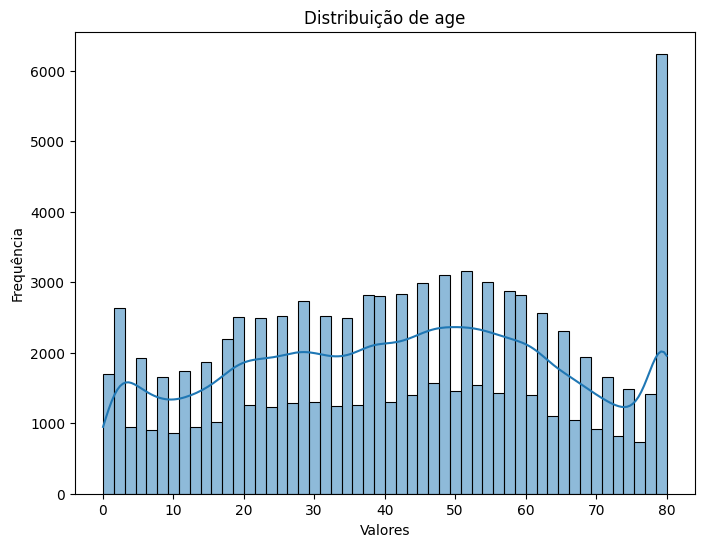

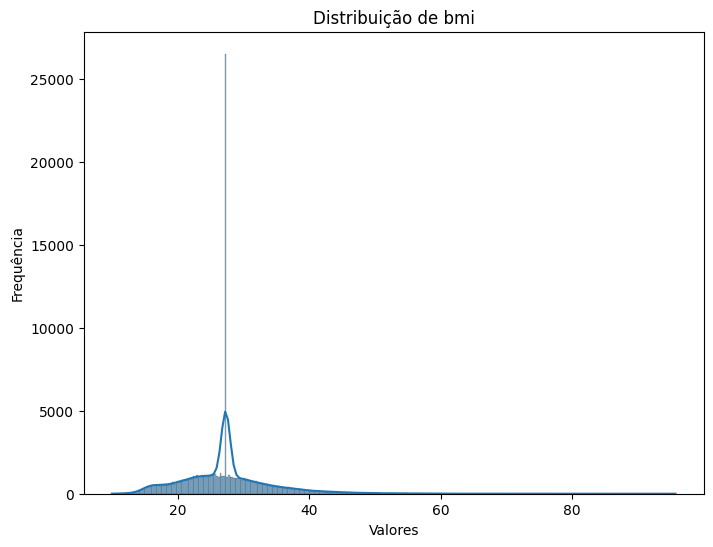

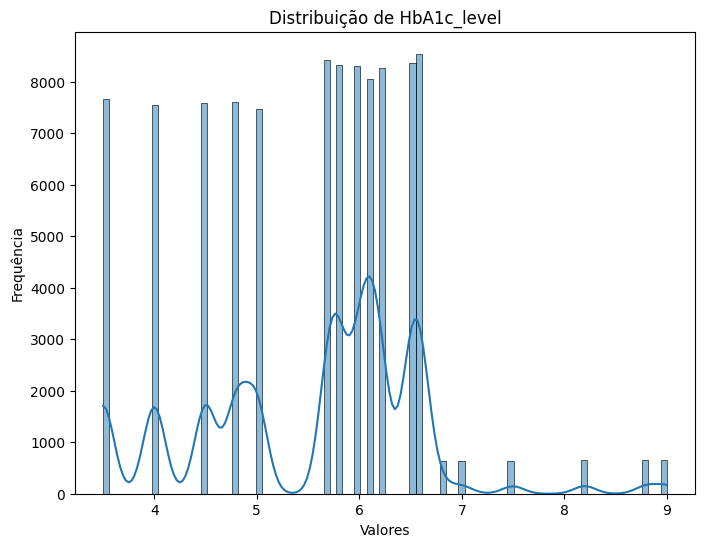

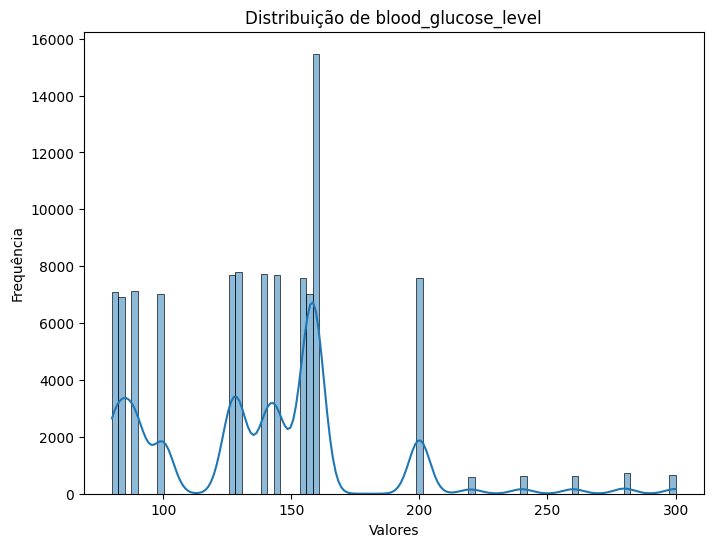

In [ ]:
# Loop através de todas as colunas do DataFrame
for column in df_distribuir.columns:
    # Plota o histograma de cada coluna
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura
    sns.histplot(df_distribuir[column], kde=True)  # Plota o histograma com uma estimativa da densidade
    plt.title(f"Distribuição de {column}")
    plt.xlabel("Valores")
    plt.ylabel("Frequência")
    plt.show()  # Exibe o gráfico

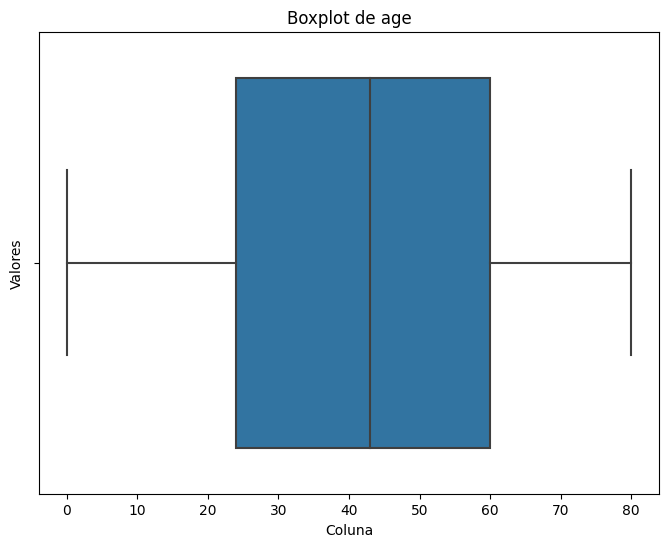

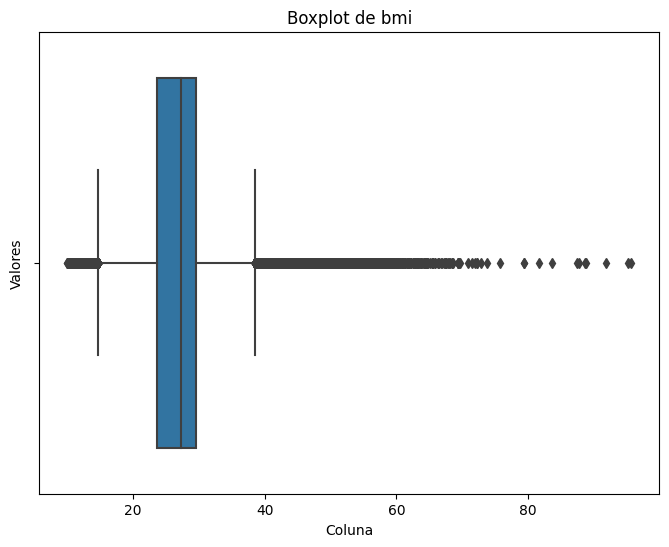

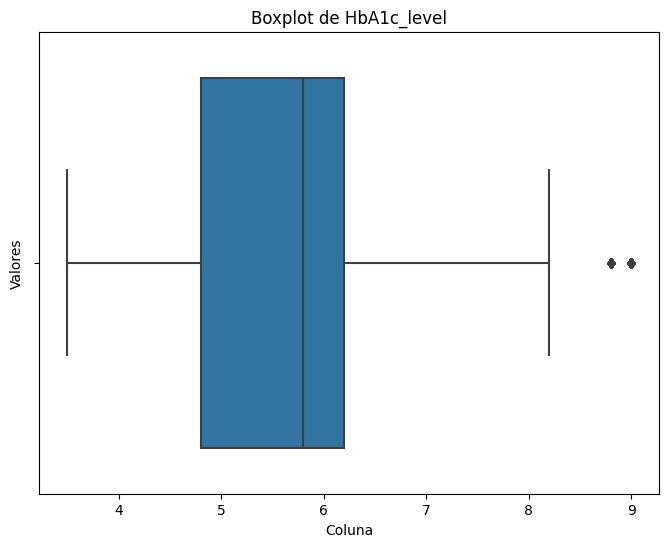

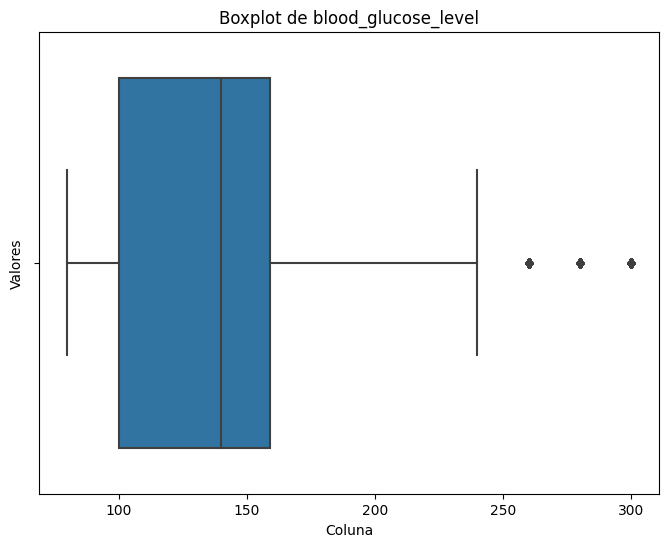

In [ ]:
# Loop através de todas as colunas do DataFrame
for column in df_distribuir.columns:
    # Plota o boxplot de cada coluna
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura
    sns.boxplot(x=df_distribuir[column])  # Plota o boxplot da coluna atual
    plt.title(f"Boxplot de {column}")
    plt.xlabel("Coluna")
    plt.ylabel("Valores")
    plt.show()  # Exibe o gráfico

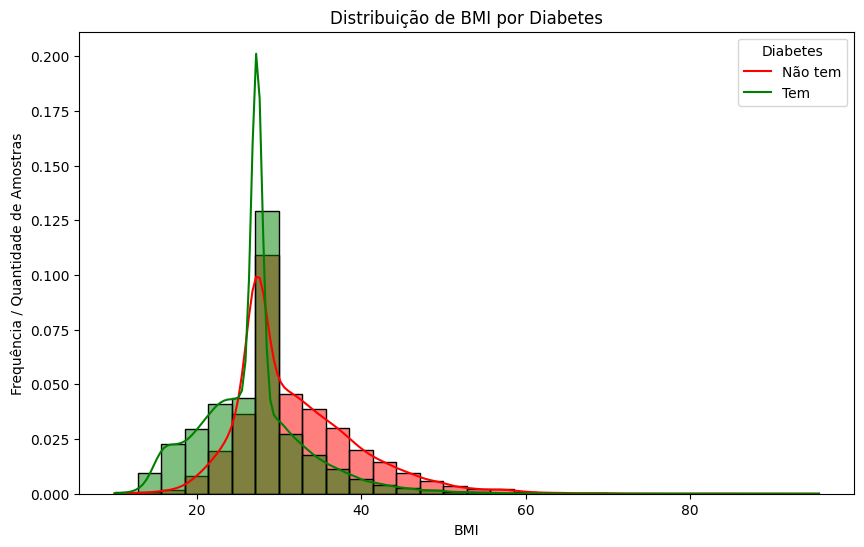

In [ ]:
# Criação do gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='diabetes', kde=True, bins=30, palette={0: 'green', 1: 'red'}, stat='density', common_norm=False)
plt.xlabel('BMI')
plt.ylabel('Frequência / Quantidade de Amostras')
plt.title('Distribuição de BMI por Diabetes')
plt.legend(title='Diabetes', labels=['Não tem', 'Tem'])
plt.show()

# Detecção de Anomalias:

## 3 standard deviation

Para aplicar esse método, é necessário identificar quais colunas seguem uma distribuição gaussiana, pois só é possível utilizá-lo nesse caso.

A distribuição gaussiana, também conhecida como distribuição normal, é uma das distribuições estatísticas mais comuns encontradas na natureza e em muitos fenômenos naturais e humanos. Ela é caracterizada por uma forma de sino simétrica, em que os dados são centrados em torno da média e a maioria dos valores está próxima da média.

In [ ]:
alpha = 0.05
len(df.keys()) == len([key for key in df.keys() if normaltest(df[key])[1] < alpha])

True

Podemos inferir que todas as colunas que passaram pela validação possuem uma distribuição gaussiana, dado que o número total de colunas existentes é igual ao número de colunas validadas.

Essa afirmação sugere que, com base na validação, todas as colunas foram consideradas como tendo uma distribuição gaussiana.

Com base nisso o trexo de codigo a seguir ira identificar os registros de cada coluna que fogem dos limites e que serão marcados como anomalias.

In [ ]:
for key in df.keys():
  anomalies = {}
  if len(df[key].unique()) > 2:
    uppper_limit = df[key].mean() + 3*df[key].std()
    lower_limit = df[key].mean() + -3*df[key].std()

    anomalies = [value for value in df[key] if value > uppper_limit or value < lower_limit]

    print(
        key,
        f'-> total rows:{len(df[key])}',
        f',anomalies_detected:{len(anomalies)}',
        f',anomaly %: {(len(anomalies)/len(df[key]))}%'
    )

gender -> total rows:100000 ,anomalies_detected:0 ,anomaly %: 0.0%
age -> total rows:100000 ,anomalies_detected:0 ,anomaly %: 0.0%
smoking_history -> total rows:100000 ,anomalies_detected:0 ,anomaly %: 0.0%
bmi -> total rows:100000 ,anomalies_detected:1294 ,anomaly %: 0.01294%
HbA1c_level -> total rows:100000 ,anomalies_detected:1315 ,anomaly %: 0.01315%
blood_glucose_level -> total rows:100000 ,anomalies_detected:1403 ,anomaly %: 0.01403%


##SVM


Vamos utilizar o SVM para treinar um modelo com dados não anômalos e classifica novos pontos como anômalos ou não com base na distância em relação à região normal. É uma técnica útil para identificar pontos de dados que se desviam significativamente do comportamento típico da distribuição dos dados.

nesse exemplo estaremos utilizando apenas os dados não categoricos pais ao realizar um teste previo notamos que as colunas categoricas não demonstravam um bom resultado no processo de predição.

In [ ]:
result = {}

#colunas não categoricas
for key in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    model = svm.OneClassSVM(nu=0.05)

    key_df = df[[key, 'diabetes']]

    test = key_df.sample(frac=0.3)
    train = key_df.drop(test.index)

    x = model.fit(train)
    prediction = model.predict(test)

    result[key] = len([
        1
        for i, predictio in enumerate(prediction)
        if predictio == -1 ]
    )

print(result)

{'age': 1447, 'bmi': 1535, 'HbA1c_level': 7866, 'blood_glucose_level': 3008}


# Conclusão

Colunas com maior número de anomalias: As colunas 'HbA1c_level' e 'blood_glucose_level' apresentaram o maior número de anomalias em ambos os algoritmos (SVM e 3 desvios padrão). Isso sugere que essas colunas podem ter pontos de dados que se desviam significativamente do comportamento típico dos dados e podem conter informações importantes para a detecção de anomalias relacionadas à diabetes.

Relação entre colunas e anomalias: As colunas 'bmi' e 'age' não apresentaram anomalias significativas em ambos os algoritmos. Isso indica que essas colunas possuem valores que estão dentro dos limites esperados e não divergem muito do comportamento típico da distribuição dos dados.

Diferenças entre os algoritmos: O SVM identificou um maior número de anomalias em comparação ao método de 3 desvios padrão em todas as colunas. Isso pode indicar que o SVM é mais sensível para detectar anomalias sutis ou que estão além dos limites estatísticos estabelecidos.

Em resumo, as colunas 'HbA1c_level' e 'blood_glucose_level' mostraram um maior número de anomalias, sugerindo que elas podem ser fatores importantes na detecção de anomalias relacionadas à diabetes. As colunas 'bmi' e 'age' não apresentaram anomalias significativas, indicando que elas estão mais alinhadas com o comportamento típico dos dados. A escolha do algoritmo (SVM ou 3 desvios padrão) afetou a quantidade de anomalias detectadas, com o SVM mostrando-se mais sensível na detecção de anomalias. Essas conclusões podem orientar análises futuras e investigações mais aprofundadas em relação às anomalias encontradas nessas colunas específicas.

---

## Z score:
o Z-score é uma medida estatística que padroniza valores em relação à média e ao desvio-padrão, permitindo comparações entre diferentes conjuntos de dados e a identificação de valores atípicos.

In [ ]:
# Selecione as colunas numéricas nas quais deseja aplicar o Z-score
colunas_numericas = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Calcule o Z-score para as colunas selecionadas
df[colunas_numericas] = (df[colunas_numericas] - df[colunas_numericas].mean()) / df[colunas_numericas].std()

# Exiba os primeiros registros da base de dados com o Z-score aplicado
print(df)


         gender       age  hypertension  heart_disease  smoking_history  \
0      0.840107  1.692695     -0.284438       4.936354                5   
1      0.840107  0.538004     -0.284438      -0.202577                0   
2     -1.188549 -0.616688     -0.284438      -0.202577                5   
3      0.840107 -0.261398     -0.284438      -0.202577                2   
4     -1.188549  1.515050      3.515669       4.936354                2   
...         ...       ...           ...            ...              ...   
99995  0.840107  1.692695     -0.284438      -0.202577                0   
99996  0.840107 -1.771379     -0.284438      -0.202577                0   
99997 -1.188549  1.070938     -0.284438      -0.202577                4   
99998  0.840107 -0.794332     -0.284438      -0.202577                5   
99999  0.840107  0.671237     -0.284438      -0.202577                2   

            bmi  HbA1c_level  blood_glucose_level  diabetes  
0     -0.321054     1.001701         